In [320]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime 

dataset = pd.read_csv('/Users/swagataashwani/Desktop/MachineLearningTemplate/Eye_Surgery_Case_study/eye_surgery.csv') 

In [321]:
#### EDA ####
dataset.head() # Viewing the Data

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity
0,3/14/70,D,Male,True,18,NaN,X,MINOR
1,10/23/98,I,Male,True,17,NaN,Y,MINOR
2,7/25/74,A,Male,True,8,NaN,Y,MINOR
3,11/6/82,D,Male,True,8,NaN,X,MINOR
4,7/24/70,B,Male,True,9,NaN,Y,SEVERE


In [322]:
dataset.isna().sum()

date_of_birth               0
patient_insurance           3
patient_sex                 0
success                     0
surgeon_id                  0
over_under_correction    2810
treatment                   0
initial_severity            0
dtype: int64

In [323]:
dataset.shape

(3500, 8)

In [324]:
#Convert date_of_birth to age
start_date= datetime.date(2020,3,27)
dataset['date_of_birth']  = pd.to_datetime(dataset['date_of_birth'] , format='%m/%d/%y')
dataset['date_of_birth']  = dataset['date_of_birth'] .where(dataset['date_of_birth']  < start_date, dataset['date_of_birth']  -  np.timedelta64(100, 'Y'))
dataset['age'] = ( start_date- dataset['date_of_birth'] ).astype('<m8[Y]').astype(int) 

#Drop date_of_birth column
dataset = dataset.drop(columns = ['date_of_birth'])

In [325]:
#Encoding Categorical Variables
dataset['success'] = dataset['success']*1
dataset['patient_sex'] = dataset['patient_sex'].map( {'Male':1, 'Female':0} )
dataset['initial_severity'] = dataset['initial_severity'].map( {'MINOR':1, 'SEVERE':0} )
#dataset['over_under_correction'] = dataset['over_under_correction'].map( {'OVER':1, 'UNDER':0} ) 
dataset['treatment'] = dataset['treatment'].map( {'X':1, 'Y':0} ) 

In [326]:
# Encoding NAN 
dataset['over_under_correction']=  dataset['over_under_correction'].replace(np.nan, 0)

In [327]:
dataset['over_under_correction'].value_counts()

0        2810
UNDER     599
OVER       91
Name: over_under_correction, dtype: int64

In [328]:
dataset.shape

(3500, 8)

In [329]:
dataset.isna().any() 

patient_insurance         True
patient_sex               True
success                  False
surgeon_id               False
over_under_correction    False
treatment                False
initial_severity         False
age                      False
dtype: bool

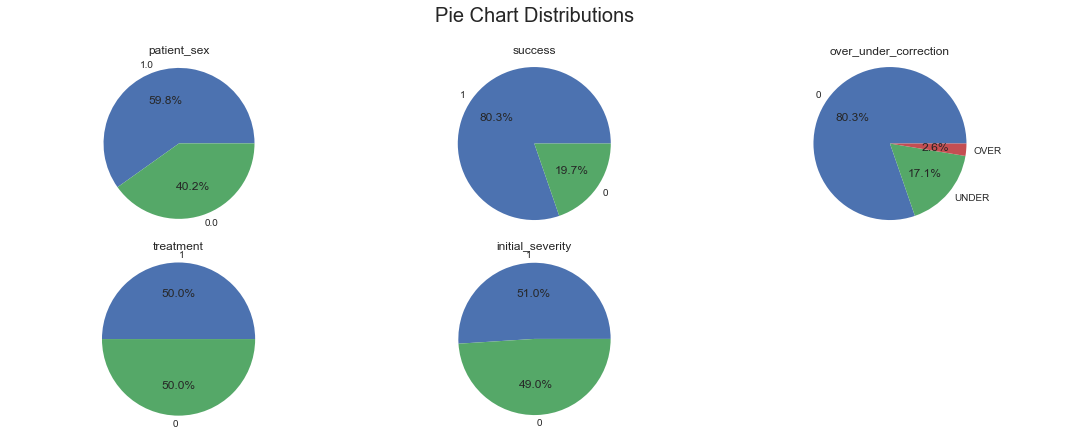

In [330]:
## Pie Plots

dataset2 = dataset.drop(columns = ['patient_insurance','age','surgeon_id'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(4, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [331]:
dataset = dataset.dropna(subset=['patient_insurance','patient_sex'])

In [332]:
dataset.isna().any() 

patient_insurance        False
patient_sex              False
success                  False
surgeon_id               False
over_under_correction    False
treatment                False
initial_severity         False
age                      False
dtype: bool

In [333]:
dataset.shape

(3496, 8)

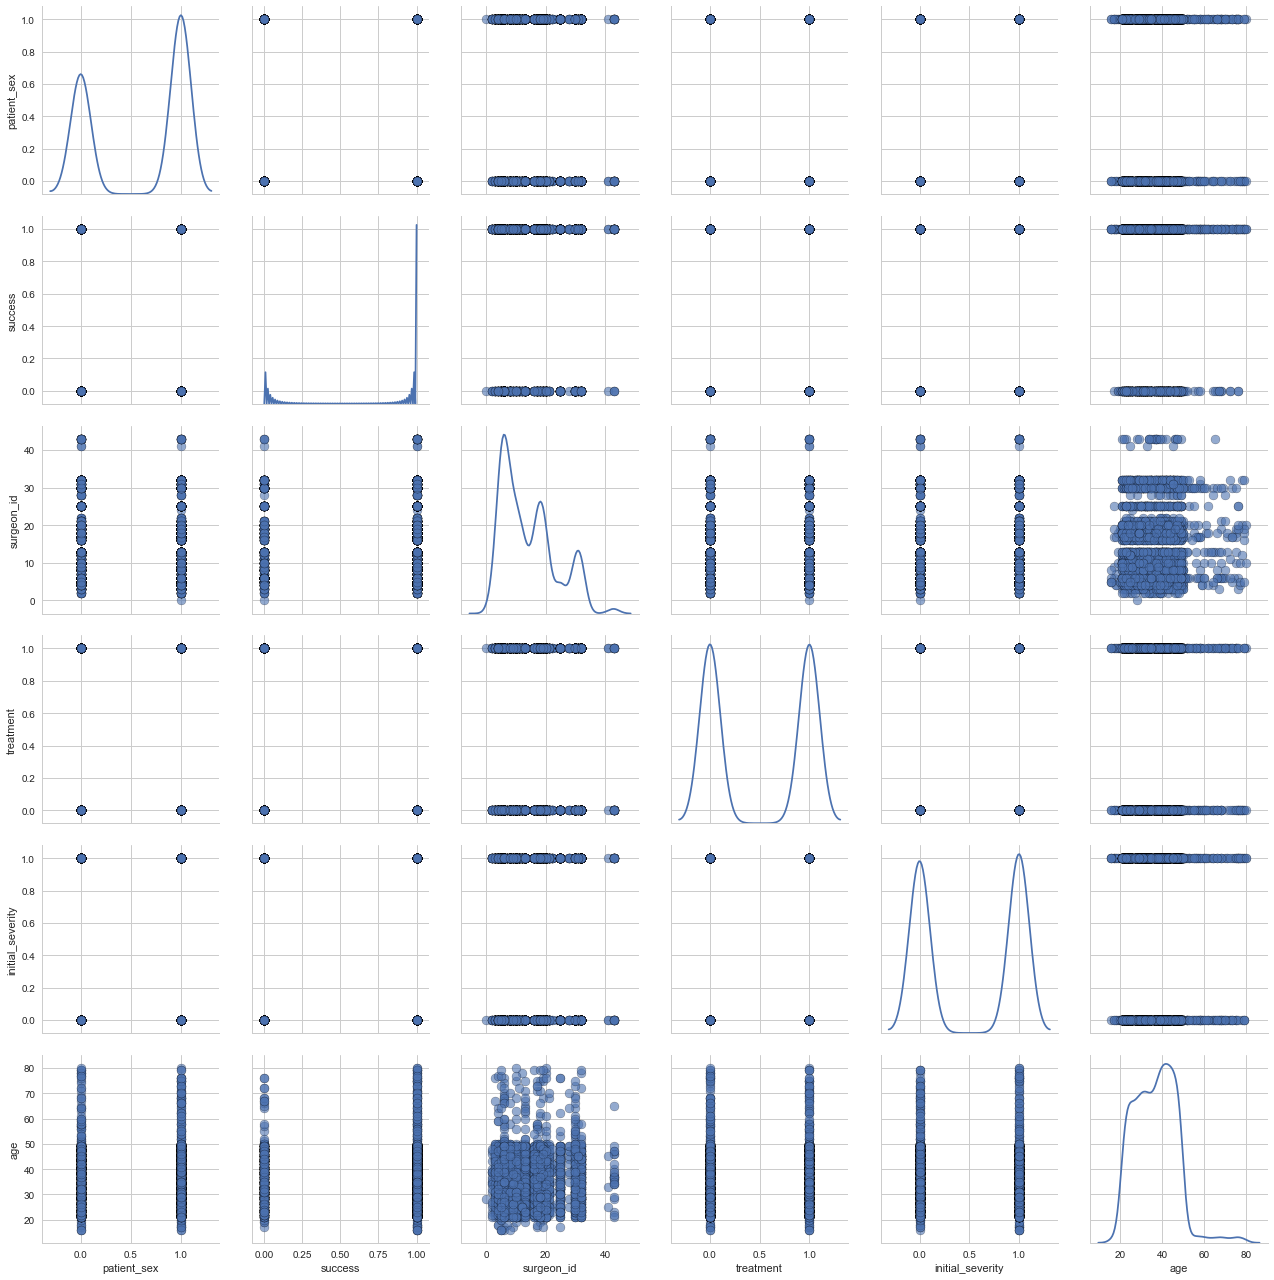

In [334]:
#Pair plots
sn.pairplot(dataset, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 3)
plt.show()

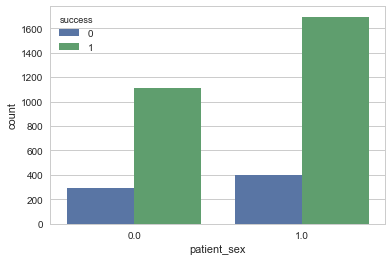

In [335]:
#Count plots 
#patient_sex vs success
sn.countplot(x=dataset['patient_sex'], hue = dataset['success'],data=pd.melt(dataset))

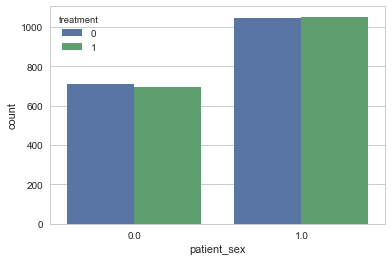

In [336]:
sn.countplot(x=dataset['patient_sex'], hue = dataset['treatment'],data=pd.melt(dataset))

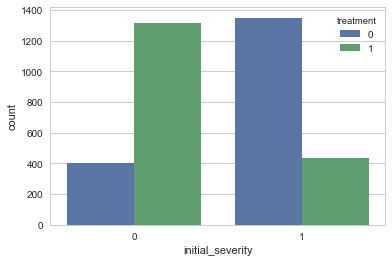

In [337]:
sn.countplot(x=dataset['initial_severity'], hue = dataset['treatment'],data=pd.melt(dataset))

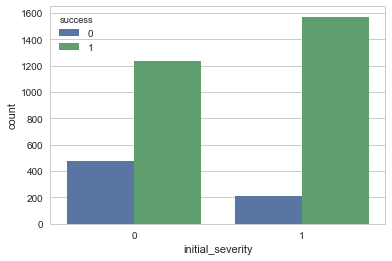

In [338]:
sn.countplot(x=dataset['initial_severity'], hue = dataset['success'],data=pd.melt(dataset))

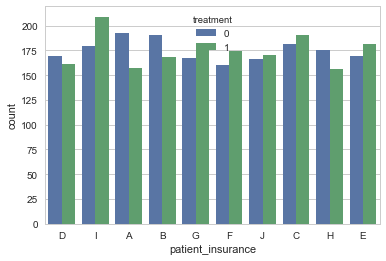

In [339]:
sn.countplot(x=dataset['patient_insurance'], hue = dataset['treatment'],data=pd.melt(dataset))

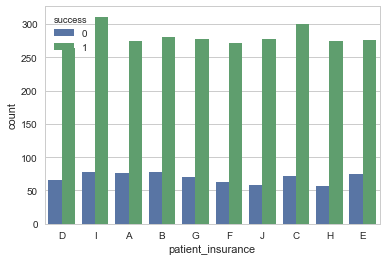

In [340]:
sn.countplot(x=dataset['patient_insurance'], hue = dataset['success'],data=pd.melt(dataset))

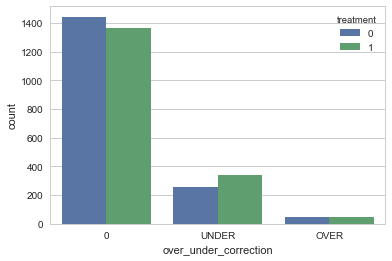

In [341]:
sn.countplot(x=dataset['over_under_correction'], hue = dataset['treatment'],data=pd.melt(dataset))

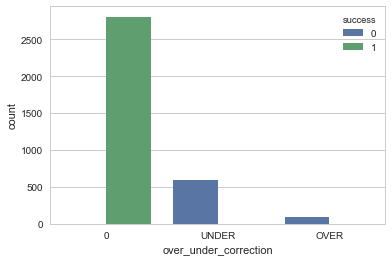

In [342]:
sn.countplot(x=dataset['over_under_correction'], hue = dataset['success'],data=pd.melt(dataset))

Text(0.5,0,u'success')

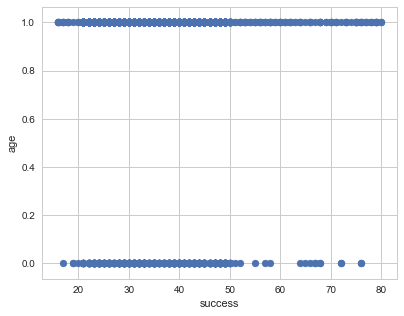

In [343]:
#age vs success
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(dataset['age'], dataset['success'])
plt.ylabel('age')
plt.xlabel('success')


Text(0.5,0,u'treatment')

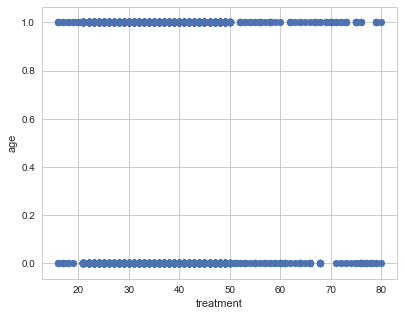

In [344]:
#age vs treatment
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(dataset['age'], dataset['treatment'])
plt.ylabel('age')
plt.xlabel('treatment')

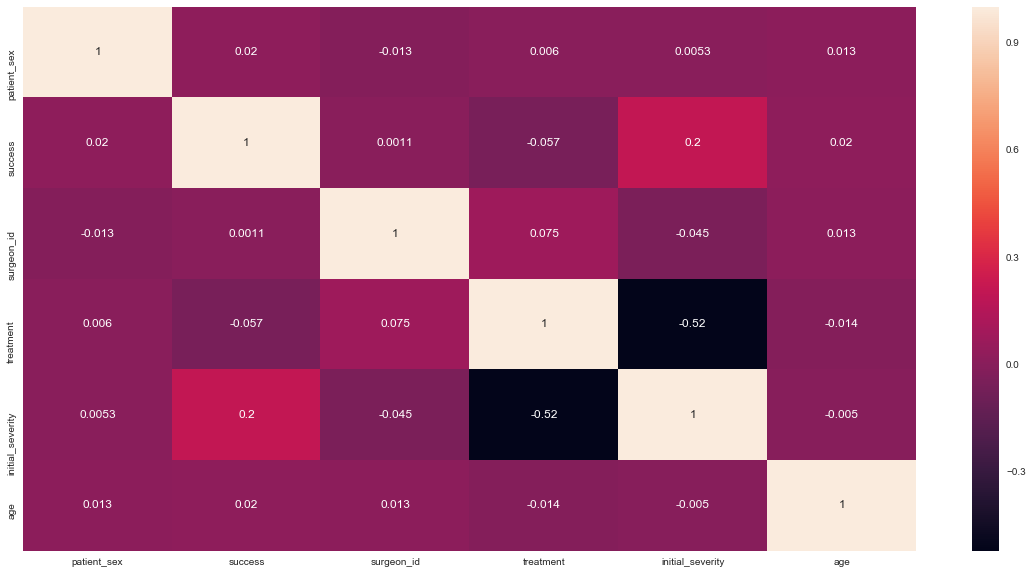

In [345]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sn.heatmap(dataset.corr(), annot=True)

In [346]:
dataset.head()

,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity,age
0,D,1,1,18,0,1,1,50
1,I,1,1,17,0,0,1,21
2,A,1,1,8,0,0,1,45
3,D,1,1,8,0,1,1,37
4,B,1,1,9,0,0,0,49


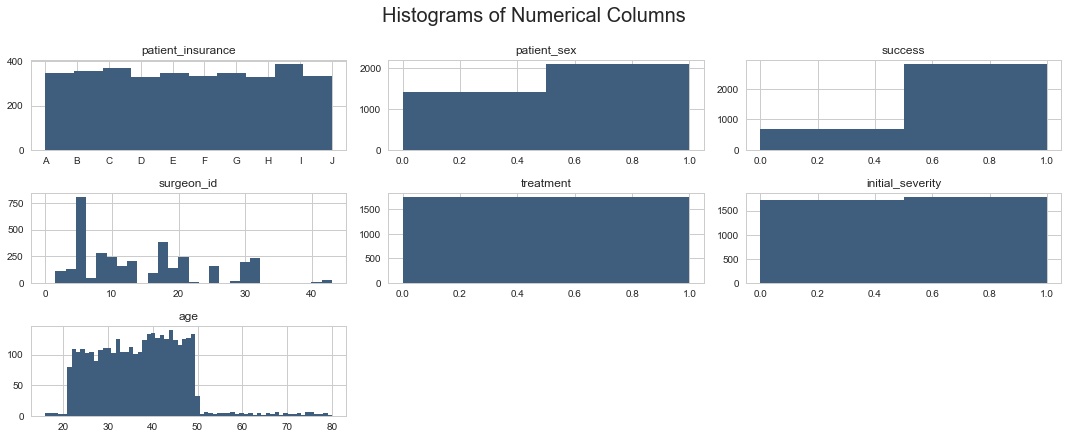

In [347]:
## Histograms

dataset2 = dataset.drop(columns = ['over_under_correction'])
#dataset2 = dataset.copy()
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [348]:
dataset.to_csv('new_eye.csv', index = False)